In [10]:
import numpy as np
import os
import datetime
import os
import matplotlib.pyplot as plt
from imageio import imread
from skimage import io, transform
from skimage.transform import resize

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [11]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In [12]:
train_doc = np.random.permutation(open('Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('Project_data/val.csv').readlines())

# Batch size handled in class

batch_size = 64

In [33]:
def generator(source_path, folder_list, batch_size, factor_ht=0, factor_wd=0 ):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    
    img_idx = np.arange(0,30,2) #create a list of image numbers you want to use for a particular video
    
    while True:
        t = np.random.permutation(folder_list)


        num_batches = len(folder_list)//batch_size # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,len(img_idx),100,100,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    if factor_ht!=0 or factor_wd!=0:
                        image_ht, image_wd, _ = image.shape
                        ht1 = int(factor_ht / 2)
                        ht2 = image_ht - int(factor_ht /2)
                        wd1 = int(factor_wd / 2)
                        wd2 = image_wd - int(factor_wd / 2)
                        image=image[ht1:ht2, wd1:wd2,:]

                    image = resize(image,(100,100))
                    batch_data[folder,idx,:,:,0] = image[:,:,0]/255
                    batch_data[folder,idx,:,:,1] = image[:,:,1]/255
                    batch_data[folder,idx,:,:,2] = image[:,:,2]/255
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        rem_image = len(folder_list)%batch_size
        batch += 1
        if(rem_image!=0):
            batch_data = np.zeros((rem_image,len(img_idx),100,100,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((rem_image,5)) # batch_labels is the one hot representation of the output
            for folder in range(rem_image): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                   # CROP 
                    if factor_ht!=0 or factor_wd!=0:
                        image_ht, image_wd, _ = image.shape
                        ht1 = int(factor_ht / 2)
                        ht2 = image_ht - int(factor_ht /2)
                        wd1 = int(factor_wd / 2)
                        wd2 = image_wd - int(factor_wd / 2)
                        image=image[ht1:ht2, wd1:wd2,:]
                    
                    # Normalize
                    image = resize(image,(100,100))
                    batch_data[folder,idx,:,:,0] = image[:,:,0]
                    batch_data[folder,idx,:,:,1] = image[:,:,1]
                    batch_data[folder,idx,:,:,2] = image[:,:,2]
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels
            

In [34]:
def loss(history):
        acc = history.history['categorical_accuracy']
        val_acc = history.history['val_categorical_accuracy']

        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs_range = range(len(history.history['loss']))

        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.show()

In [20]:
curr_dt_time = datetime.datetime.now()
train_path = 'Project_data/train'
val_path = 'Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 1 # choose the number of epochs
print ('# epochs =', num_epochs)
num_classes = 5

# training sequences = 663
# validation sequences = 100
# epochs = 1


### Testing Generator function

Source path =  Project_data/train ; batch size = 32


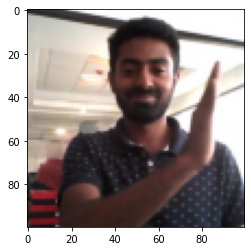

In [30]:
# Test Generator Function

xtrain=generator('Project_data/train',train_doc, 32 )
x=next(xtrain)
plt.imshow(x[0][1][1])

Source path =  Project_data/train ; batch size = 32


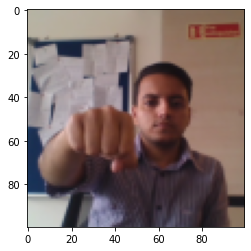

In [29]:
# Test Crop in Generator Function

xtrain=generator('Project_data/train',train_doc, 32, factor_ht=10, factor_wd=10)
x=next(xtrain)
plt.imshow(x[0][1][1])

### Define Keras Classes

In [32]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, LeakyReLU
from tensorflow.keras.applications import EfficientNetB0

## Model 1

In [13]:
#write your model here

Input_shape = (15, 100, 100, 3)
model_1 = Sequential()
model_1.add(Conv3D(32, (3,3,3), padding='same',
                 input_shape=Input_shape))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))

model_1.add(Conv3D(32, (3, 3,3)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPooling3D(pool_size=(2, 2,2)))

model_1.add(Dropout(0.5))

model_1.add(Conv3D(64, (3, 3,3), padding='same'))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(Conv3D(64, (3, 3,3)))

model_1.add(Activation('relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling3D(pool_size=(2, 2,2)))

model_1.add(Dropout(0.5))

model_1.add(Flatten())

model_1.add(Dense(5))
model_1.add(Activation('softmax'))

In [ ]:
optimiser = Adam(learning_rate=0.001) 
model_1.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_1.summary())

In [ ]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_1.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)

### Model 2

In [14]:
# Define Model

lrelu = lambda x: LeakyReLU(alpha=0.1)(x)

model_2 = Sequential()

model_2.add(Conv3D(16,(3,3,3),  padding='same', input_shape= (15,100,100,3) ))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Conv3D(16,(3,3,3),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Dropout(0.5))
model_2.add(MaxPooling3D(pool_size= (2,2,2)))

model_2.add(Conv3D(32,(3,3,3),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Conv3D(32,(3,3,3),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Dropout(0.5))
model_2.add(MaxPooling3D(pool_size= (2,2,2)))

model_2.add(Conv3D(64,(3,3,3),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Conv3D(64,(3,3,3),padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation(lrelu))
model_2.add(Dropout(0.5))
model_2.add(MaxPooling3D(pool_size= (2,2,2)))

model_2.add(Flatten())

model_2.add(Dense(64))
model_2.add(BatchNormalization())
model_2.add(Activation('elu'))
model_2.add(Dropout(0.25))

model_2.add(Dense(32))
model_2.add(BatchNormalization())
model_2.add(Activation('elu'))
model_2.add(Dropout(0.25))

model_2.add(Dense(5, activation='softmax'))

In [ ]:
optimiser = Adam(learning_rate=0.001) 
model_2.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_2.summary())

In [ ]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_2.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)

### Model 3

In [40]:
# Define Model

model_3 = Sequential()

model_3.add(Conv3D(16,(5,5,5),   padding='same', input_shape= (15,100,100,3) ))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling3D(pool_size= (2,2,2)))

model_3.add(Conv3D(64,(3,3,3),padding='same'))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))
model_3.add(MaxPooling3D(pool_size= (2,2,2)))

# model_3.add(Conv3D(32,(1,3,3), padding='same'))
# model_3.add(BatchNormalization())
# model_3.add(Activation('relu'))
# model_3.add(MaxPooling3D(pool_size= (2,2,2)))

# model_3.add(Conv3D(64,(1,3,3), padding='same'))
# model_3.add(BatchNormalization())
# model_3.add(Activation('relu'))
# model_3.add(MaxPooling3D(pool_size= (2,2,2)))

model_3.add(Flatten())

model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.5))

model_3.add(Dense(5, activation='softmax'))

In [36]:
optimiser = Adam(learning_rate=0.001) 
model_3.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 15, 100, 100, 8)   656       
                                                                 
 batch_normalization (BatchN  (None, 15, 100, 100, 8)  32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 15, 100, 100, 8)   0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 7, 50, 50, 8)     0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 7, 50, 50, 16)     3472      
                                                                 
 batch_normalization_1 (Batc  (None, 7, 50, 50, 16)    6

In [37]:
num_epochs=20

In [38]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train ; batch size = 64
Epoch 1/20
11/11 [==============================] - ETA: 0s - loss: 25.1877 - categorical_accuracy: 0.2564Source path =  Project_data/val ; batch size = 64

Epoch 1: saving model to Gesture_recog_2022-04-1001_07_14.869243\model-00001-25.18767-0.25641-203.17563-0.15000.h5
11/11 [==============================] - 109s 10s/step - loss: 25.1877 - categorical_accuracy: 0.2564 - val_loss: 203.1756 - val_categorical_accuracy: 0.1500 - lr: 0.0010
Epoch 2/20
11/11 [==============================] - ETA: 0s - loss: 12.1873 - categorical_accuracy: 0.2790
Epoch 2: saving model to Gesture_recog_2022-04-1001_07_14.869243\model-00002-12.18729-0.27903-130.19879-0.11000.h5
11/11 [==============================] - 98s 9s/step - loss: 12.1873 - categorical_accuracy: 0.2790 - val_loss: 130.1988 - val_categorical_accuracy: 0.1100 - lr: 0.0010
Epoch 3/20
11/11 [==============================] - ETA: 0s - loss: 5.1091 - categorical_accuracy: 0.3183
Epoch 3:

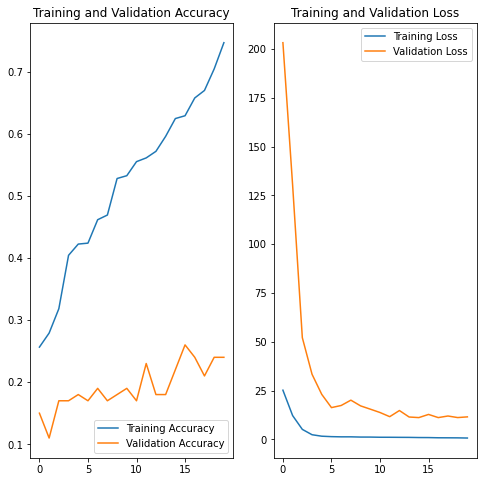

In [39]:
loss(history)

In [41]:
optimiser = Adam(learning_rate=0.001) 
model_3.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_3.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_2 (Conv3D)           (None, 15, 100, 100, 16)  6016      
                                                                 
 batch_normalization_2 (Batc  (None, 15, 100, 100, 16)  64       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 15, 100, 100, 16)  0         
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 7, 50, 50, 16)    0         
 3D)                                                             
                                                                 
 conv3d_3 (Conv3D)           (None, 7, 50, 50, 64)     27712     
                                                                 
 batch_normalization_3 (Batc  (None, 7, 50, 50, 64)   

In [ ]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_3.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  Project_data/train ; batch size = 64
Epoch 1/20
 1/11 [=>............................] - ETA: 3:17 - loss: 35.1852 - categorical_accuracy: 0.2656

In [ ]:
loss(history)

### Model 4

In [ ]:
# Define Model

model_4 = Sequential()

model_4.add(Conv3D(8,(3,3,3),   padding='same', input_shape= (15,100,100,3) ))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Conv3D(16,(3,3,3),padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(MaxPooling3D(pool_size= (2,2,2)))

model_4.add(Conv3D(16,(3,3,3),padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Conv3D(32,(3,3,3),padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(MaxPooling3D(pool_size= (2,2,2)))

model_4.add(Conv3D(32,(1,3,3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Conv3D(64,(3,3,3),padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(MaxPooling3D(pool_size= (2,2,2)))

model_4.add(Conv3D(64,(1,3,3), padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(Conv3D(128,(3,3,3),padding='same'))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))

model_4.add(MaxPooling3D(pool_size= (2,2,2)))

model_4.add(Flatten())

model_4.add(Dense(1000))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.25))

model_4.add(Dense(500))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))
model_4.add(Dropout(0.25))

model_4.add(Dense(5, activation='softmax'))

In [ ]:
optimiser = Adam(learning_rate=0.001) 
model_4.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_4.summary())

In [ ]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_4.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)

### Model 5

In [ ]:
# Define Model

model_5 = Sequential()

model_5.add(Conv3D(8,(3,3,3),   padding='same', input_shape= (15,100,100,3) ))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(Conv3D(16,(3,3,3),padding='same', activation='relu'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(MaxPooling3D(pool_size= (2,2,2)))

model_5.add(Conv3D(16,(3,3,3),padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(Conv3D(32,(3,3,3),padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(MaxPooling3D(pool_size= (2,2,2)))

model_5.add(Conv3D(32,(3,3,3), padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))
model_5.add(Conv3D(64,(3,3,3),padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(MaxPooling3D(pool_size= (2,2,2)))

model_5.add(Conv3D(64,(3,3,3), padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(Conv3D(128,(3,3,3),padding='same'))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))

model_5.add(MaxPooling3D(pool_size= (2,2,2)))

model_5.add(Flatten())

model_5.add(Dense(1000))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_5.add(Dropout(0.25))

model_5.add(Dense(500))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))
model_3.add(Dropout(0.25))

model_5.add(Dense(5, activation='softmax'))

In [ ]:
optimiser = Adam(learning_rate=0.001) 
model_5.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_5.summary())

In [ ]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_5.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)

### Model 6

In [ ]:
# Define Model

model_6 = Sequential()

model_6.add(Conv3D(32,(2,2,2), activation='elu', input_shape=(15,100,100,3), padding = "same" ))
model_6.add(Conv3D(32,(2,2,2),  activation='elu'))
model_6.add(Dropout(0.5))
model_6.add(BatchNormalization())
model_6.add(MaxPooling3D(pool_size= (2,2,2)))

model_6.add(Conv3D(64,(2,2,2), activation='elu', padding = "same" ))
model_6.add(Conv3D(64,(2,2,2),  activation='elu'))
model_6.add(Dropout(0.5))
model_6.add(BatchNormalization())
model_6.add(MaxPooling3D(pool_size= (2,2,2)))

model_6.add(Conv3D(128,(2,2,2), activation='elu', padding = "same" ))
model_6.add(Conv3D(128,(2,2,2),  activation='elu'))
model_6.add(Dropout(0.5))
model_6.add(BatchNormalization())
model_6.add(MaxPooling3D(pool_size= (2,2,2)))

model_6.add(Flatten())

model_6.add(Dense(128, activation='elu'))
model_6.add(Dense(64, activation='elu'))
model_6.add(Dense(5, activation='softmax'))

In [ ]:
optimiser = Adam(learning_rate=0.001) 
model_6.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_6.summary())

In [ ]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_6.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)

### Model 7

In [ ]:
model_7 = Sequential()

model_7.add(TimeDistributed(Conv2D(32, (3,3), padding = "same"), input_shape=(15,100,100,3)))
model_7.add(TimeDistributed(BatchNormalization()))
model_7.add(TimeDistributed(Activation('relu')))
model_7.add(TimeDistributed(Dropout(0.5))
            
model_7.add(TimeDistributed(Conv2D(32,(3,3))))
model_7.add(TimeDistributed(BatchNormalization()))
model_7.add(TimeDistributed(Activation('relu')))
model_7.add(TimeDistributed(Dropout(0.5)))
            
model_7.add(TimeDistributed(MaxPooling2D(pool_size= (2,2))))

model_7.add(TimeDistributed(Conv2D(64, (3,3),  padding = "same")))
model_7.add(TimeDistributed(BatchNormalization()))
model_7.add(TimeDistributed(Activation('relu')))
model_7.add(TimeDistributed(Dropout(0.5))
            
model_7.add(TimeDistributed(Conv2D(64,(3,3))))
model_7.add(TimeDistributed(BatchNormalization()))
model_7.add(TimeDistributed(Activation('relu')))
model_7.add(TimeDistributed(Dropout(0.5))
            
model_7.add(TimeDistributed(MaxPooling2D(pool_size= (2,2))))

model_7.add(TimeDistributed(Flatten()))
model_7.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5))

model_7.add(Dense(5, activation='softmax'))

In [ ]:
optimiser = Adam(learning_rate=0.001) 
model_7.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_7.summary())

In [ ]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_7.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)

### Model 8

In [ ]:
model_8 = Sequential()

model_8.add(TimeDistributed(Conv2D(32, (3,3), padding = "same"), input_shape=(15,100,100,3)))
model_8.add(TimeDistributed(BatchNormalization()))
model_8.add(TimeDistributed(Activation('relu')))
model_8.add(TimeDistributed(Dropout(0.5))
            
model_8.add(TimeDistributed(Conv2D(32,(3,3))))
model_8.add(TimeDistributed(BatchNormalization()))
model_8.add(TimeDistributed(Activation('relu')))
model_8.add(TimeDistributed(Dropout(0.5)))
            
model_8.add(TimeDistributed(MaxPooling2D(pool_size= (2,2))))

model_8.add(TimeDistributed(Conv2D(64, (3,3),  padding = "same")))
model_8.add(TimeDistributed(BatchNormalization()))
model_8.add(TimeDistributed(Activation('relu')))
model_8.add(TimeDistributed(Dropout(0.5))
            
model_8.add(TimeDistributed(Conv2D(64,(3,3))))
model_8.add(TimeDistributed(BatchNormalization()))
model_8.add(TimeDistributed(Activation('relu')))
model_8.add(TimeDistributed(Dropout(0.5))
            
model_8.add(TimeDistributed(MaxPooling2D(pool_size= (2,2))))

model_8.add(TimeDistributed(Flatten()))
model_8.add(GRU(64,dropout=0.5, recurrent_dropout=0.5))

model_8.add(Dense(5, activation='softmax'))

In [ ]:
optimiser = Adam(learning_rate=0.001) 
model_8.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_8.summary())

In [ ]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_8.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)

### Model 9

In [ ]:
model_9 = Sequential()
model_9.add(TimeDistributed(EfficientNetB0(weights='imagenet', include_top=False),input_shape=Input_shape))

for layer in model_9.layers:
    layer.trainable = False

model_9.add(TimeDistributed(Flatten()))    
model_9.add(GRU(128,dropout=0.5, recurrent_dropout=0.5))
model_9.add(Dense(5,activation='softmax'))

In [ ]:
optimiser = Adam(learning_rate=0.001) 
model_9.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model_9.summary())

In [ ]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

model_name = 'Gesture_recog' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

LR = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 10,
  verbose = 1, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 0)
callbacks_list = [checkpoint, LR]

if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
history = model_9.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

In [ ]:
loss(history)